In [1]:
# reading cnn_samples and federal_samples

import pandas as pd
import ast
import numpy as np

df1 = pd.read_csv("cnn_samples.csv")
df2 = pd.read_csv("federal_samples.csv")
df2.rename(columns = {"embeddings": "embedding"}, inplace = True)

# fix embedding column
embed_col = []
for i in range(len(df1["embedding"])):
    embed_col.append(df1["embedding"][i])

for i in range(len(df2["embedding"])):
    embed_col.append(df2["embedding"][i])

for i in range(len(df1["embedding"])+len(df2["embedding"])):
    embed_col[i] = ast.literal_eval(embed_col[i])

df = pd.concat([df1, df2])
df["embedding"] = embed_col

In [4]:
# clustering data

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

inertias = []
max_clusters = 30

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(preprocessing.normalize(df["embedding"].tolist()))
    inertias.append(kmeans.inertia_)

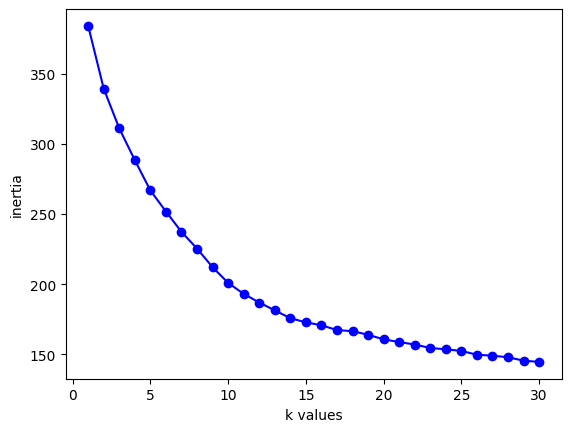

In [5]:
# graphing inertias

plt.plot(range(1, max_clusters + 1),inertias, '-bo')
plt.xlabel("k values")
plt.ylabel("inertia")
plt.show()

We determined that k = 12 is optimal because after k = ~12, the inertia stops rapidly decreasing.

In [6]:
# add labels to dataframe

kmeans = KMeans(n_clusters=12, random_state=0).fit(preprocessing.normalize(df["embedding"].tolist()))

if "labels" in df.columns:
    df["labels"] = kmeans.labels_
else:
    df.insert(0, "labels", kmeans.labels_)

In [7]:
# make predictions about categories

categories = [
    "Technology",
    "Money",
    "Law",
    "Environment",
    "Other",
    "Health",
    "Employment",
    "World News",
    "Politics",
    "Entertainment",
    "Violence",
    "Other"
]

In [8]:
# import challenge articles

dfc = pd.read_csv("challenge.csv")
dfc.rename(columns = {"embeddings": "embedding"}, inplace = True)

embed_col = []
for i in range(len(dfc["embedding"])):
    embed_col.append(ast.literal_eval(dfc["embedding"][i]))

dfc["embedding"] = embed_col

In [9]:
# predict categories for 5 challenge articles

for i in kmeans.predict(preprocessing.normalize(dfc["embedding"].tolist())):
    print(categories[i])

Entertainment
Entertainment
Health
World News
Environment


In [12]:
# print top 3 articles most similar to challenge articles

from scipy import spatial

def cos_similarity(a, b):
    return 1 - spatial.distance.cosine(a, b)

for i in range(0, 5):
    similarities = [cos_similarity(embedding, dfc["embedding"][i]) for embedding in df["embedding"]]
    top_3 = sorted(similarities, reverse=True)[0:3]

    print(top_3)
    print(df.iloc[similarities.index(top_3[0]), 3][0:100])
    print(df.iloc[similarities.index(top_3[1]), 3][0:100])
    print(df.iloc[similarities.index(top_3[2]), 3][0:100])
    print()

[0.8070927869054605, 0.8047635531994215, 0.803327863916594]
LONDON, England (CNN) -- The Screening Room went to the Theatre Royal in Drury Lane in the heart of 
(CNN) -- Hate to stand in long lines on Black Friday? After getting your fill of Thanksgiving turkey
LONDON, England (CNN) -- Getting "out of this world" with civilian space travel is not quite as simp

[0.9665118691237833, 0.7595008813120413, 0.7163007338621993]
(CNN) -- The credit crisis has transformed the global financial landscape, bankrupting established n
(CNN) -- "Grey's Anatomy" star Patrick Dempsey believes he and a group of investors are just what th
(CNN) -- Matthew McConaughey tied the knot with longtime girlfriend Camila Alves at an intimate cere

[0.9655711099949233, 0.9608629658468245, 0.9439563028414478]
(CNN) -- Concern over the spread of the Ebola virus has caused the cancellation of an African Cup of
(CNN) -- Saudi Arabia has had its first death from swine flu, its Ministry of Health said Monday, br
MADRID, 

In [13]:
# import mystery challenge

dfj = pd.read_json("mystery.json")
dfj.rename(columns = {"embeddings": "embedding"}, inplace = True)

In [14]:
# predict category of mystery article
print(categories[kmeans.predict(preprocessing.normalize([dfj["embedding"]]))[0]])

World News


In [15]:
# print articles most similar to mystery article

similarities = [cos_similarity(embedding, dfj["embedding"]) for embedding in df["embedding"]]
print(df.iloc[similarities.index(max(similarities)), 3][0:100])

(CNN) -- At least 37 people, including 26 civilians and some Syrian soldiers, were killed in a car b


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8acd1949-f0b2-4f72-a9f9-393c67b9ad4b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>